<a href="https://colab.research.google.com/github/nupur1262/trying_face_detection/blob/master/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [3]:
!kaggle datasets download -d nupurpahuja09/facedetection

 89% 81.0M/91.2M [00:00<00:00, 65.6MB/s]
100% 91.2M/91.2M [00:00<00:00, 104MB/s] 


In [4]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: not_me/197600.jpg       
  inflating: not_me/197601.jpg       
  inflating: not_me/197602.jpg       
  inflating: not_me/197603.jpg       
  inflating: not_me/197604.jpg       
  inflating: not_me/197605.jpg       
  inflating: not_me/197606.jpg       
  inflating: not_me/197607.jpg       
  inflating: not_me/197608.jpg       
  inflating: not_me/197609.jpg       
  inflating: not_me/197610.jpg       
  inflating: not_me/197611.jpg       
  inflating: not_me/197612.jpg       
  inflating: not_me/197613.jpg       
  inflating: not_me/197614.jpg       
  inflating: not_me/197615.jpg       
  inflating: not_me/197616.jpg       
  inflating: not_me/197617.jpg       
  inflating: not_me/197618.jpg       
  inflating: not_me/197619.jpg       
  inflating: not_me/197620.jpg       
  inflating: not_me/197621.jpg       
  inflating: not_me/197622.jpg       
  inflating: not_me/197623.jpg       
  inflating: not_me/197624.jpg       

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [6]:
import os
import shutil
os.makedirs('/content/train_data')
shutil.move('/content/not_me','/content/train_data/')
shutil.move('/content/me' , '/content/train_data/')

'/content/train_data/me'

In [7]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, )
data = ImageDataBunch.from_folder(Path("train_data"), train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['me', 'not_me']

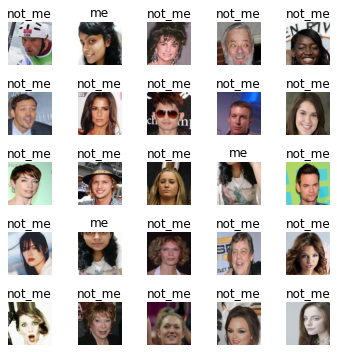

In [13]:
data.show_batch(rows=5, figsize=(5,5))

In [14]:
alexnet_learn=cnn_learner(data, models.alexnet, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [15]:
mobilenetv2_learn=cnn_learner(data, models.mobilenet_v2, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


##ALEXNET MODEL

In [17]:
alexnet_learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.021513,0.003031,0.000000,01:14
1,0.010425,0.000482,0.000000,01:13
2,0.004206,0.000102,0.000000,01:12
3,0.002603,0.000083,0.000000,01:13


In [19]:
alexnet_learn.save('stage-1')

In [20]:
interp = ClassificationInterpretation.from_learner(alexnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

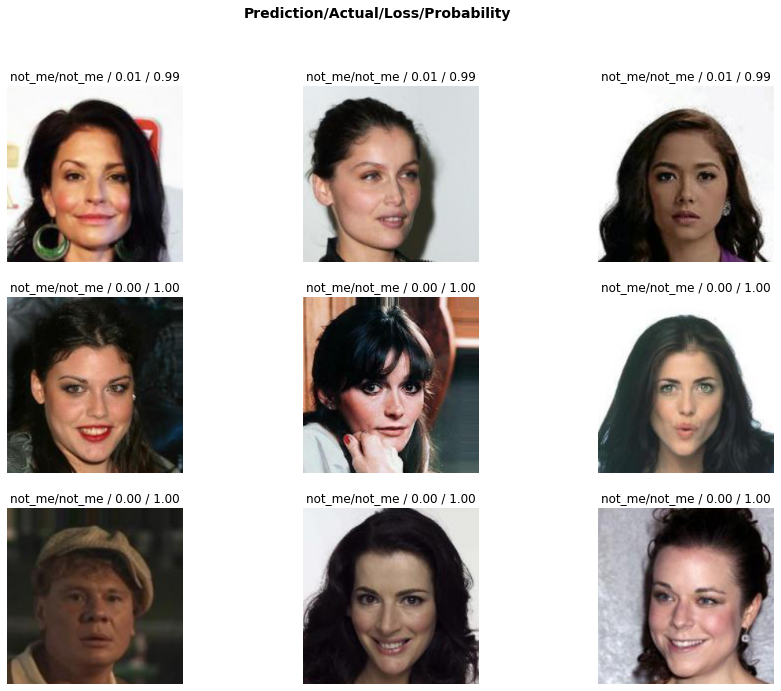

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

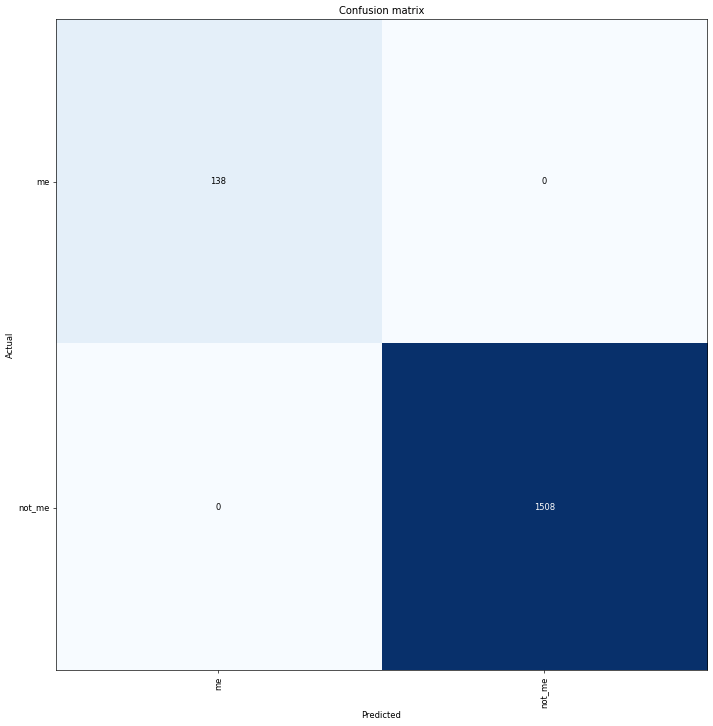

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [26]:
alexnet_learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


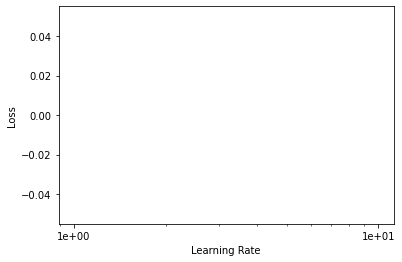

In [29]:
alexnet_learn.recorder.plot()

##MOBILENETV2 MODEL

In [31]:
mobilenetv2_learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.251694,0.010488,0.000608,01:22
1,0.062077,0.001495,0.000000,01:21
2,0.035403,0.000732,0.000000,01:22
3,0.007029,0.000456,0.000000,01:22


In [32]:
mobilenetv2_learn.save('stage-2')

In [33]:
interp = ClassificationInterpretation.from_learner(mobilenetv2_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

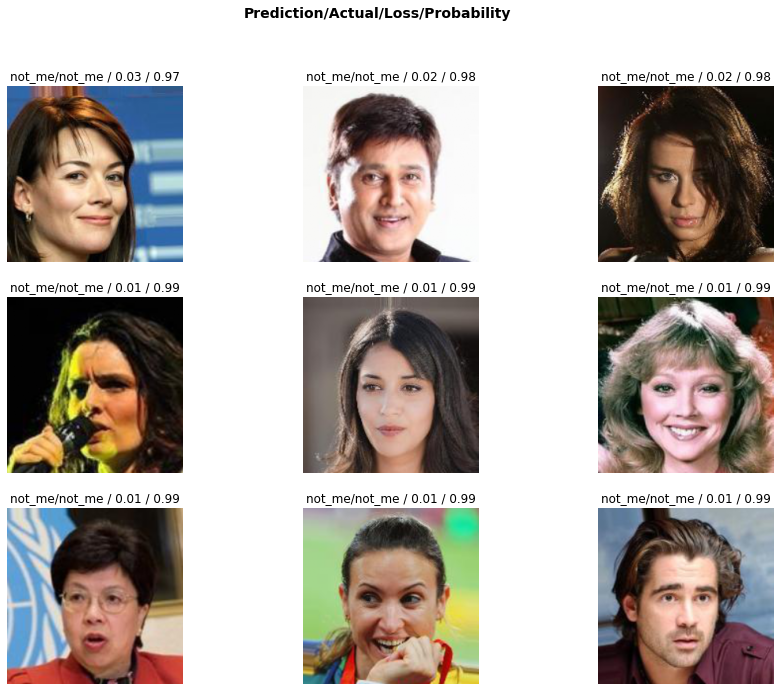

In [34]:
interp.plot_top_losses(9, figsize=(15,11))

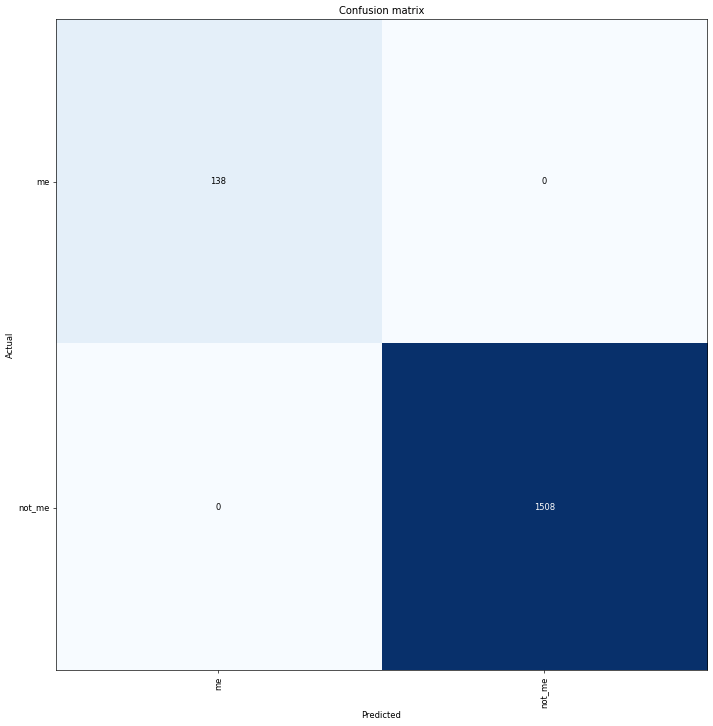

In [35]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [36]:
mobilenetv2_learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


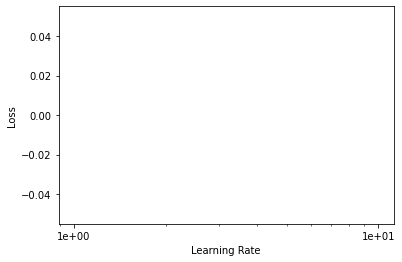

In [37]:
mobilenetv2_learn.recorder.plot()

##SAVING THE MODEL

In [38]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [39]:
os.makedirs("/content/drive/My Drive/face-detection/",exist_ok=True)

In [40]:
my_dir="/content/drive/My Drive/face-detection"

In [41]:
alexnet_learn.save(my_dir+"/Stage-1")

In [43]:
alexnet_learn.load("/content/drive/My Drive/face-detection/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (6588 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
not_me,not_me,not_me,not_me,not_me
Path: train_data;

Valid: LabelList (1646 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
not_me,not_me,not_me,not_me,not_me
Path: train_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (

In [44]:
alexnet_learn.export(my_dir+"/export.pkl")

In [45]:
os.makedirs("/content/export_values",exist_ok=True)
my_path = "/content/export_values"
alexnet_learn.save(my_path+"/Stage-1")
alexnet_learn.export(my_path+"/export.pkl")

In [46]:
!pip install -U kora

In [47]:
from kora.drive import upload_public
url2 = upload_public('/content/export_values/export.pkl')
url2

'https://drive.google.com/uc?id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl'

In [48]:
from kora.drive import upload_public
url2 = upload_public('/content/export_values/Stage-1.pth')
url2

'https://drive.google.com/uc?id=1DPDQkw72TyDJX-CyCvvKsbzBXKMrGiNG'